In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

**Аппроксимация** - (как и интерполяция) это метод нахождения новых точек данных на основе диапазона дискретного набора известных точек данных.

**Аппроксимация** – это замена исходной функции $f(x)$ приближенной функцией $\varphi(x)$ так, чтобы отклонение $f(x)$ от $\varphi(x)$ было наименьшим.

**MSE** - cредняя квадратическая ошибка. \
функция потерь
$$ MSE = \frac{\sum\limits_{i=1}^{\infty}(y_i - f(x_i))^2}{n} $$

**RMSE** - среднеквадратическая ошибка. \
масштаб ошибок такой же, как масштаб целей
$$ RMSE = \sqrt{MSE} $$

In [2]:
def MSE(f, points_X, points_Y):
    pred_Y  = [f(x) for x in points_X]
    return sum(np.subtract(points_Y, pred_Y)**2) / len(points_X)

In [3]:
def my_plot(X, Y, points_X, points_Y, lim_x, lim_y):
    plt.figure()
    plt.xlim(0, lim_x)
    plt.ylim(0, lim_y)

    plt.scatter(points_X, points_Y, c='r')
    plt.plot(X, Y, 'b')
    plt.show();

---

In [4]:
points_X = [2, 4, 8]
points_Y = [12.258, 17.24, 30.151]

In [5]:
def f(x):
    return 3*x + 5

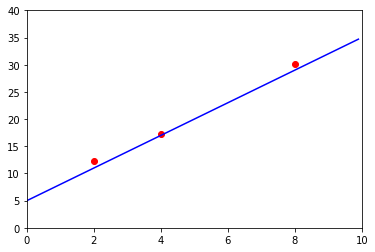

In [6]:
X = np.arange(0, 10, 0.1)
Y = [f(x) for x in X]

my_plot(X, Y, points_X, points_Y, 10, 40)

In [7]:
MSE(f, points_X, points_Y)

0.9883216666666655

---

In [8]:
points_X = [2, 4, 8, 10, 12]
points_Y = [4.872, 29.707, 246.971, 485.727, 840.658]

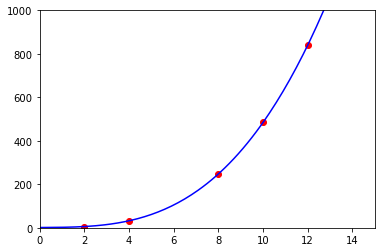

In [9]:
X = np.arange(0, 15, 0.1)
Y = [0.5*x**3 - 0.25*x**2 + 0.75*x + 1.25 for x in X]

my_plot(X, Y, points_X, points_Y, 15, 1000)

In [10]:
MSE(lambda x: 0.5*x**3 - 0.25*x**2 + 0.75*x + 1.25, points_X, points_Y)

3.404513399999994

---

In [11]:
points_X = [1, 2, 3, 4, 6, 8]
points_Y = [1, 1.7, 3.3, 4.05, 5.95, 8.2]

In [12]:
x, a5, a4, a3, a2, a1, a0 = sp.symbols('x, a5, a4, a3, a2, a1, a0')

In [13]:
f = a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0
f

a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5

In [14]:
eq1 = f.subs(x, 1) - 1
print(eq1)
eq2 = f.subs(x, 2) - 1.7
print(eq2)
eq3 = f.subs(x, 3) - 3.3
print(eq3)
eq4 = f.subs(x, 4) - 4.05
print(eq4)
eq5 = f.subs(x, 6) - 5.95
print(eq5)
eq6 = f.subs(x, 8) - 8.2
print(eq6)

a0 + a1 + a2 + a3 + a4 + a5 - 1
a0 + 2*a1 + 4*a2 + 8*a3 + 16*a4 + 32*a5 - 1.7
a0 + 3*a1 + 9*a2 + 27*a3 + 81*a4 + 243*a5 - 3.3
a0 + 4*a1 + 16*a2 + 64*a3 + 256*a4 + 1024*a5 - 4.05
a0 + 6*a1 + 36*a2 + 216*a3 + 1296*a4 + 7776*a5 - 5.95
a0 + 8*a1 + 64*a2 + 512*a3 + 4096*a4 + 32768*a5 - 8.2


In [15]:
coef = sp.linsolve([eq1, eq2, eq3, eq4, eq5, eq6], [a5, a4, a3, a2, a1, a0])
coef

{(-0.0148809523809525, 0.321011904761909, -2.53452380952384, 8.97113095238106, -12.8255952380954, 7.08285714285723)}

In [16]:
f = f.subs({a5:coef.args[0][0], a4:coef.args[0][1], a3:coef.args[0][2], \
            a2:coef.args[0][3], a1:coef.args[0][4], a0:coef.args[0][5]})
f

-0.0148809523809525*x**5 + 0.321011904761909*x**4 - 2.53452380952384*x**3 + 8.97113095238106*x**2 - 12.8255952380954*x + 7.08285714285723

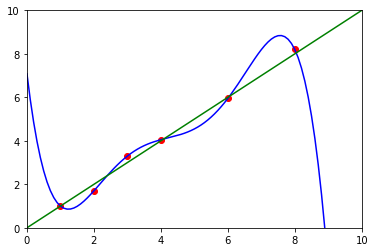

In [17]:
X = np.arange(0, 15, 0.1)
Y1 = [f.subs(x, x0).evalf() for x0 in X]
Y2 = [x0 for x0 in X]

plt.figure()
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.scatter(points_X, points_Y, c='r')
plt.plot(X, Y1, 'b')
plt.plot(X, Y2, 'g')
plt.show();

In [18]:
# синяя
round(MSE(sp.lambdify(x, f), points_X, points_Y), 8)

0.0

In [19]:
# зеленая
round(MSE(lambda x: x, points_X, points_Y), 8)

0.0375

---
---
---